# NIH X-Ray Image Classification Project

Link to the dataset: https://www.kaggle.com/datasets/nih-chest-xrays/data

### Setup

In [50]:
import torch
import pandas as pd
import numpy as np
import random

from torch import nn

In [ ]:
# set seed
random.seed(526)

# Data Exploration

## Data Import and Overview

In [44]:
df = pd.read_csv("Data_Entry_2017.csv")
df.drop(columns=["Unnamed: 11"], inplace=True)
df.rename(
    columns={
        "OriginalImage[Width": "org_img_width",
        "Height]": "org_img_height",
        "OriginalImagePixelSpacing[x": "org_img_pixel_spacing_x",
        "y]": "org_img_pixel_spacing_y",
        "Image Index": "img_index",
        "Finding Labels": "finding_labels",
        "Follow-up #": "follow_up",
        "Patient ID": "patient_id",
        "Patient Age": "patient_age",
        "Patient Gender": "patient_gender",
        "View Position": "view_position",
    },
    inplace=True,
)
# list of possible findings
findings = df.finding_labels.str.split("|", expand=True).stack().value_counts().index.to_list()
# convert seperate findings to one-hot encoding
df = pd.concat([df, df.finding_labels.str.get_dummies(sep="|")], axis=1)
df["pathological"] = df[findings].drop(columns=["No Finding"]).any(axis=1)
df.head()


,img_index,finding_labels,follow_up,patient_id,patient_age,patient_gender,view_position,org_img_width,org_img_height,org_img_pixel_spacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,pathological
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,True
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,True
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,True
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,1,0,0,0,0,False
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,1,0,0,0,0,0,0,0,True


In [47]:
df.pathological.value_counts()

False    60361
True     51759
Name: pathological, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   img_index                112120 non-null  object 
 1   finding_labels           112120 non-null  object 
 2   follow_up                112120 non-null  int64  
 3   patient_id               112120 non-null  int64  
 4   patient_age              112120 non-null  int64  
 5   patient_gender           112120 non-null  object 
 6   view_position            112120 non-null  object 
 7   org_img_width            112120 non-null  int64  
 8   org_img_height           112120 non-null  int64  
 9   org_img_pixel_spacing_x  112120 non-null  float64
 10  org_img_pixel_spacing_y  112120 non-null  float64
 11  Atelectasis              112120 non-null  int64  
 12  Cardiomegaly             112120 non-null  int64  
 13  Consolidation            112120 non-null  int64  
 14  Edem

In [46]:
print(df.finding_labels.str.split("|").explode().value_counts())
print(df.finding_labels.str.split("|").explode().value_counts().sum())

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: finding_labels, dtype: int64
141537


## Data Exploration

Random image path: images/00013616_040.png
Image height: 1024
Image width: 1024
Image class: ['Edema|Infiltration']
Image perspective: ['AP']


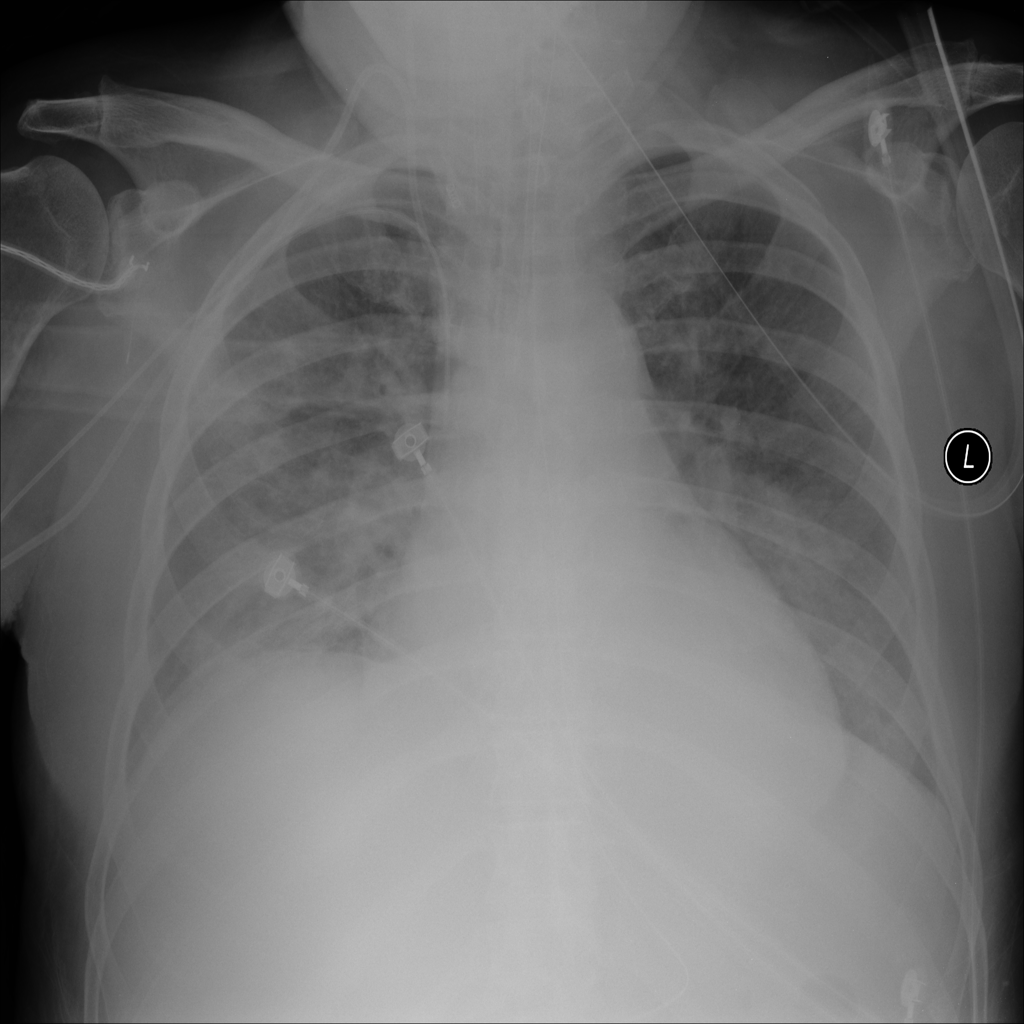

In [102]:
from PIL import Image
from pathlib import Path

image_path = Path("images")

# get all image paths
image_path_list = list(image_path.glob("*.png"))

# pick out a random image path
random_image_path = random.choice(image_path_list)

img_class = df[df.img_index == random_image_path.name].finding_labels.values
img_perspective = df[df.img_index == random_image_path.name].view_position.values

# plot image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
print(f"Image class: {img_class}")
print(f"Image perspective: {img_perspective}")
img